# DATASETS OVERVIEW

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart, 
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_scatter_hexbin,
    plot_xy_with_regression,
    plot_points_mean_std,
    plot_points_mean_std_continuous,
    plot_violin,
    plot_binned_boxpoints,
    plot_scatter_with_binned_boxplots
    )
from calcium_activity_characterization.io.csv_loader import load_dataset
from calcium_activity_characterization.analysis.statistics import (
    analyze_peak_intervals,
    build_neighbor_pair_stats,
    kw_dunn,
    brunner_pairs,
    wilcoxon_pairs,
    corr_nonparametric
)

sns.set_style(
    style="whitegrid",
    rc={"font.family": "sans-serif", "font.sans-serif": ["Arial"]}
)

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

figure_path=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


In [2]:
# Cell density per experiment
cells_counts = cells.groupby("dataset")["Cell ID"].count()

experiments["Dataset cell density"] = experiments["dataset"].map(cells_counts)
events["Dataset cell density"] = events["dataset"].map(cells_counts)
cells["Dataset cell density"] = cells["dataset"].map(cells_counts)
peaks["Dataset cell density"] = peaks["dataset"].map(cells_counts)
communications["Dataset cell density"] = communications["dataset"].map(cells_counts)

# Event counts per experiment
global_events_counts = events[events["Event type"]=="GlobalEvent"].groupby("dataset")["Event ID"].count()
sequential_events_counts = events[events["Event type"]=="SequentialEvent"].groupby("dataset")["Event ID"].count()
individual_events_counts = peaks[peaks["In event"]=="individual"].groupby("dataset")["Peak ID"].count()

experiments["Number of global events"] = experiments["dataset"].map(global_events_counts)
experiments["Number of sequential events"] = experiments["dataset"].map(sequential_events_counts)
experiments["Number of individual events"] = experiments["dataset"].map(individual_events_counts)

experiments["Number of global events"] = experiments["Number of global events"].fillna(0).astype(int)
experiments["Number of sequential events"] = experiments["Number of sequential events"].fillna(0).astype(int)
experiments["Number of individual events"] = experiments["Number of individual events"].fillna(0).astype(int)

## Experiments nomenclature & available datasets

In [3]:
display(experiments[experiments["condition"] != "unuseful"])

,path,date,image_sequence,experiment_type,condition,confluency,concentration,time,dataset,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
0,D:/Mateo/20250326/Output/IS1,20250326,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250326_IS1,1074,5,1167,834
1,D:/Mateo/20250326/Output/IS2,20250326,IS2,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326_IS2,837,0,431,853
2,D:/Mateo/20250326/Output/IS3,20250326,IS3,spontaneous,control - 1st run,1200000,NaN,NaN,20250326_IS3,985,4,1263,890
3,D:/Mateo/20250326/Output/IS4,20250326,IS4,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326_IS4,969,0,1221,1968
4,D:/Mateo/20250404/Output/IS1,20250404,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250404_IS1,1234,5,869,772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,D:/Mateo/20250810/Output/IS2,20250810,IS2,spontaneous,control - 1st run,1200000,NaN,NaN,20250810_IS2,769,2,878,1250
73,D:/Mateo/20250810/Output/IS3,20250810,IS3,stimulated,light - 1st run,1200000,NaN,300,20250810_IS3,1008,3,619,1066
74,D:/Mateo/20250810/Output/IS4,20250810,IS4,stimulated,light - 1st run,1200000,NaN,300,20250810_IS4,924,1,1545,1487
75,D:/Mateo/20250810/Output/IS5,20250810,IS5,stimulated,light - 1st run,1200000,NaN,600,20250810_IS5,1086,2,1591,1511


## Spontaneous activity

In [4]:
control_dataset = experiments[(experiments["condition"]=="control - 1st run")]
control_dataset[["dataset", "confluency", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="confluency", ascending=True)

,dataset,confluency,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
13,20250409_IS05,120000,203,2,324,493
15,20250409_IS07,120000,197,1,244,567
9,20250409_IS01,600000,463,1,703,1023
11,20250409_IS03,600000,485,0,869,1293
25,20250416_IS4,600000,876,4,665,713
55,20250624_IS01,1000000,704,4,384,845
57,20250624_IS03,1000000,562,2,645,1050
0,20250326_IS1,1200000,1074,5,1167,834
2,20250326_IS3,1200000,985,4,1263,890
4,20250404_IS1,1200000,1234,5,869,772


## ACH stimulation

In [5]:
ach_10uM_dataset = experiments[(experiments["condition"]=="ACH - 1st run") & (experiments["concentration"] == "10uM")]
ach_10uM_dataset[["dataset", "confluency", "time", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="dataset", ascending=True)

,dataset,confluency,time,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
39,20250501_IS03,300000,-300s,664,5,287,517
42,20250501_IS06,300000,+2d,594,2,291,642
44,20250501_IS08,300000,+2d,495,2,229,682
47,20250618_IS1,1000000,+2d,1161,4,564,1104
48,20250618_IS2,1000000,+2d,1039,4,404,838
59,20250624_IS05,1000000,+2d,1068,5,392,881
60,20250624_IS06,1000000,+2d,996,6,171,441
66,20250701_IS2,1200000,-300s,1048,4,1175,1188
67,20250701_IS3,1200000,-300s,849,5,175,494
69,20250701_IS5,1200000,+1800s,815,6,136,300


In [6]:
ach_1uM_dataset = experiments[(experiments["condition"]=="ACH - 1st run") & (experiments["concentration"] == "1uM")]
ach_1uM_dataset[["dataset", "confluency", "time", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="time", ascending=False)

,dataset,confluency,time,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
49,20250618_IS3,1000000,+2d,1235,6,699,576
50,20250618_IS4,1000000,+2d,1101,5,479,681
61,20250624_IS07,1000000,+2d,1229,7,246,454
62,20250624_IS08,1000000,+2d,986,5,282,704


In [7]:
ach_100nM_dataset = experiments[(experiments["condition"]=="ACH - 1st run") & (experiments["concentration"] == "100nM")]
ach_100nM_dataset[["dataset", "confluency", "time", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="time", ascending=False)

,dataset,confluency,time,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
28,20250424_IS1,1200000,-300s,1119,3,717,890
30,20250424_IS3,1200000,-300s,963,2,1124,1540
32,20250424_IS5,1200000,+2d,767,1,479,1273
34,20250424_IS7,1200000,+2d,1061,2,1025,1130
51,20250618_IS5,1000000,+2d,835,2,675,955
52,20250618_IS6,1000000,+2d,835,4,462,571
63,20250624_IS09,1000000,+2d,1244,6,250,733
64,20250624_IS10,1000000,+2d,1250,7,421,591


In [8]:
ach_10nM_dataset = experiments[(experiments["condition"]=="ACH - 1st run") & (experiments["concentration"] == "10nM")]
ach_10nM_dataset[["dataset", "confluency", "time", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="time", ascending=False)

,dataset,confluency,time,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
53,20250618_IS7,1000000,+2d,1099,4,626,994
54,20250618_IS8,1000000,+2d,920,4,375,463


## Light stimulation

In [9]:
light_dataset = experiments[(experiments["condition"]=="light - 1st run")]
light_dataset[["dataset", "confluency", "time", "Dataset cell density", "Number of global events", "Number of sequential events", "Number of individual events"]].sort_values(by="time", ascending=False)

,dataset,confluency,time,Dataset cell density,Number of global events,Number of sequential events,Number of individual events
75,20250810_IS5,1200000,600,1086,2,1591,1511
76,20250810_IS6,1200000,600,946,2,1114,1428
73,20250810_IS3,1200000,300,1008,3,619,1066
74,20250810_IS4,1200000,300,924,1,1545,1487


[2025-08-30 18:39:07] [INFO] calcium: plot_points_mean_std: N=5 for condition=control - 1st run
[2025-08-30 18:39:07] [INFO] calcium: plot_points_mean_std: N=2 for condition=light - 1st run


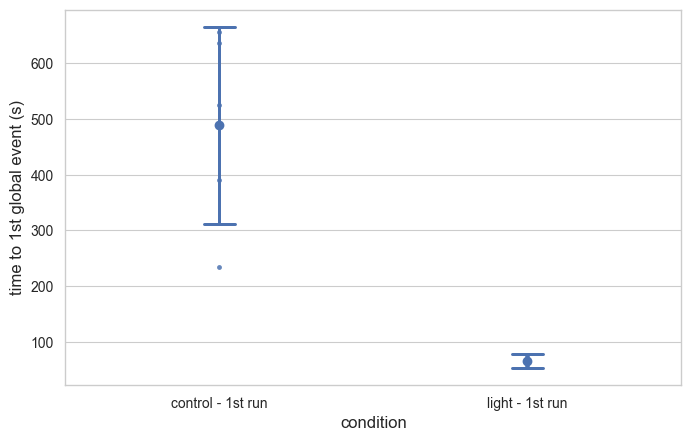

,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,mw_U,mw_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,control - 1st run,light - 1st run,5,2,525.0,391.0,637.0,66.0,61.5,70.5,10.0,0.095238,1.0,1.0,459.0,169.0,590.0,0.095238,False


In [10]:
light_dataset_high = experiments[(experiments["condition"]=="light - 1st run") & (experiments["time"] == "600" )]

light_global_events = events[(events["Event type"]=="GlobalEvent") & (events["condition"]=="light - 1st run")& (events["time"] == "600" )]
control_global_events = events[(events["Event type"]=="GlobalEvent") & (events["condition"]=="control - 1st run")& (events["Dataset cell density"] > 900 )]

light_global_events_id_1 = light_global_events[light_global_events["Event ID"] == 1]
control_global_events_id_1 = control_global_events[control_global_events["Event ID"] == 1]

global_events = pd.concat([control_global_events_id_1, light_global_events_id_1])

plot_points_mean_std(
    df=global_events,
    x="condition",
    y="Event onset time (s)",
    ylabel="time to 1st global event (s)",
    save_svg_path="C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3/figure_3_15/mean_std.svg"
)

wilcoxon_pairs(global_events, 
               group_col="condition", 
               value_col="Event onset time (s)",
               n_boot_ci=1000,
               alpha=0.05,
               print_results=False
               )


[2025-08-30 18:39:08] [INFO] calcium: plot_violin: removed 124 outliers out of 11606 on 'Prominence (noise std units)' (lower=-1515.5, upper=2112.4)
[2025-08-30 18:39:08] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_15\violin.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


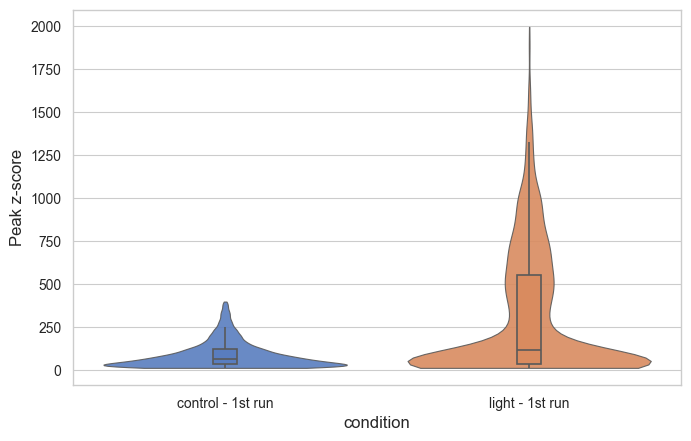

[2025-08-30 18:39:08] [INFO] calcium: plot_violin: removed 124 outliers out of 11606 on 'Prominence (noise std units)' (lower=-1515.5, upper=2112.4)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,control - 1st run,light - 1st run,6673,4809,66.5,34.8,122.5,119.0,39.3,556.5,25.772752,1.753134e-139,0.355432,-0.289136,-52.5,-67.2025,-43.495,1.753134e-139,False


In [11]:
mapping_events_to_peaks = global_events.loc[global_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")
plot_violin(
    df=subset_peaks_global_events,
    x="condition",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    filter_outliers=True,
    outliers_bounds=(3,3),
    outliers_bygroup="condition",
    save_svg_path="C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3/figure_3_15/violin.svg"
)

brunner_pairs(subset_peaks_global_events,
               group_col="condition",
               value_col="Prominence (noise std units)",    
               filter_outliers=True,
                outliers_bounds=(3, 3),
                outliers_bygroup="condition",
               n_boot_ci=1000,
               alpha=0.05,
               print_results=False
               )


[2025-08-30 18:39:09] [INFO] calcium: plot_points_mean_std: N=2 for condition=ACH - 1st run
[2025-08-30 18:39:09] [INFO] calcium: plot_points_mean_std: N=5 for condition=control - 1st run


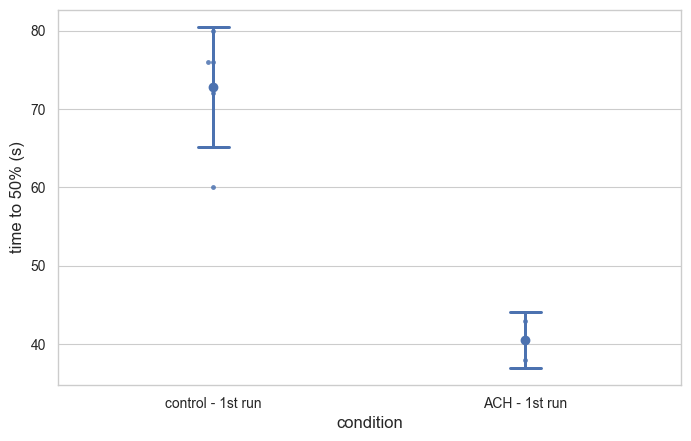

,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,mw_U,mw_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,ACH - 1st run,control - 1st run,2,5,40.5,39.25,41.75,76.0,72.0,76.0,0.0,0.095238,0.0,-1.0,-35.5,-39.5,-19.5,0.095238,False


In [12]:
ach_dataset_high = experiments[(experiments["condition"]=="ACH - 1st run") & (experiments["time"] == "-300s" ) & (experiments["concentration"] == "10uM")&(experiments["Dataset cell density"] > 800 )]

ach_global_events = events[(events["Event type"]=="GlobalEvent") & (events["condition"]=="ACH - 1st run")& (events["time"] == "-300s") & (events["concentration"] == "10uM")& (events["Dataset cell density"] > 800 )]
control_global_events = events[(events["Event type"]=="GlobalEvent") & (events["condition"]=="control - 1st run")& (events["Dataset cell density"] > 900 )]

ach_global_events_id_1 = ach_global_events[ach_global_events["Event ID"] == 1]
control_global_events_id_1 = control_global_events[control_global_events["Event ID"] == 1]

global_events = pd.concat([control_global_events_id_1, ach_global_events_id_1])

plot_points_mean_std(
    df=global_events,
    x="condition",
    y="Time to 50% (s)",
    ylabel="time to 50% (s)",
    save_svg_path="C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3/figure_3_16/mean_std.svg"
)

wilcoxon_pairs(global_events, 
               group_col="condition", 
               value_col="Time to 50% (s)",
               n_boot_ci=1000,
               alpha=0.05,
               print_results=False
               )



[2025-08-30 18:39:09] [INFO] calcium: plot_violin: removed 119 outliers out of 9165 on 'Prominence (noise std units)' (lower=-463.2, upper=927.7)
[2025-08-30 18:39:09] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_16\violin.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


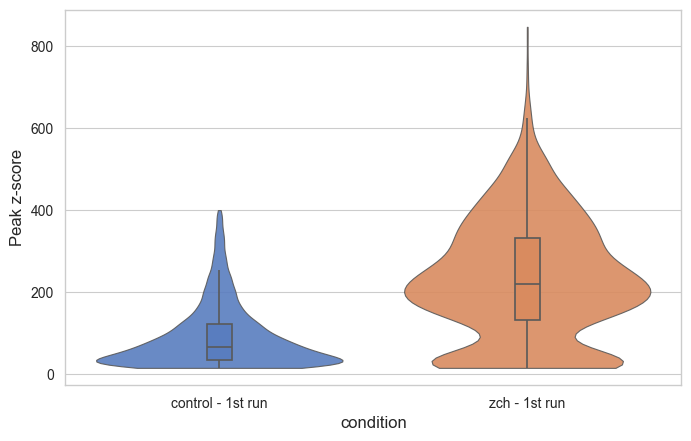

[2025-08-30 18:39:09] [INFO] calcium: plot_violin: removed 119 outliers out of 9165 on 'Prominence (noise std units)' (lower=-463.2, upper=927.7)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,control - 1st run,zch - 1st run,6673,2373,66.5,34.8,122.5,219.7,132.9,331.6,41.36374,9.579718e-293,0.223476,-0.553047,-153.2,-158.8025,-147.9,9.579718e-293,False


In [13]:

mapping_events_to_peaks = global_events.loc[global_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")


subset_peaks_global_events["condition"] = subset_peaks_global_events["condition"].replace("ACH - 1st run", "zch - 1st run")

plot_violin(
    df=subset_peaks_global_events,
    x="condition",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    filter_outliers=True,
    outliers_bounds=(3,3),
    outliers_bygroup="condition",
    save_svg_path="C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3/figure_3_16/violin.svg"
)

brunner_pairs(subset_peaks_global_events,
               group_col="condition",
               value_col="Prominence (noise std units)",    
               filter_outliers=True,
                outliers_bounds=(3, 3),
                outliers_bygroup="condition",
               n_boot_ci=1000,
               alpha=0.05,
               print_results=False
               )
